<a href="https://colab.research.google.com/github/abhimanyu922/Advance-data-science/blob/main/timeseriesbasic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis – Introduction

![](https://imgs.search.brave.com/H4fOA8U1LXQaym_gPrUK6LbFc0ez0o3aSpRqN6ZUg1g/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9idWls/dGluLmNvbS9zaXRl/cy93d3cuYnVpbHRp/bi5jb20vZmlsZXMv/c3R5bGVzL2NrZWRp/dG9yX29wdGltaXpl/L3B1YmxpYy9pbmxp/bmUtaW1hZ2VzL2lt/YWdlNS5wbmc)


# Airline analysis of passengers
  
  * Reference dataset :https://www.kaggle.com/datasets/rakannimer/air-passengers

In [2]:
# Step 0 : Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# step 1 : Load the data


In [4]:
#use pandas dataframe
df = pd.read_csv('/content/AirPassengers.csv')

In [5]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


# Step 2 : data cleaning

In [7]:
#null  value
df.isnull().sum()

,0
Month,0
#Passengers,0


In [8]:
# duplicates value
df.duplicated().sum()

np.int64(0)

# Step 3 : EDA

In [9]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [11]:
# object type of data
df.describe(include='object')

,Month
count,144
unique,144
top,1949-01
freq,1


In [12]:
#change the month column into datetime object
df['Month'] = pd.to_datetime(df['Month'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [14]:
df.head()


,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


<Figure size 1000x600 with 0 Axes>

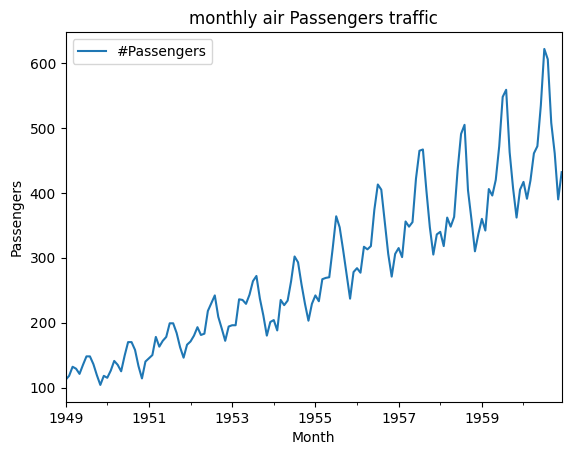

In [18]:
#line plot
plt.figure(figsize=(10,6))
df.plot(x='Month', y='#Passengers', kind='line',title='monthly air Passengers traffic')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

# FEATURE ENGINEERING- DECOMOPOSITION OF TIME SERIES

In [19]:
# MAKE MONTH COLUMN INDEX
df.set_index('Month', inplace=True)

In [23]:
df.head(20)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


**Y = L+ T+ S+ N**
LEVEL + TREND + SEASONALITY + NOISE

Y = L+T+S+N

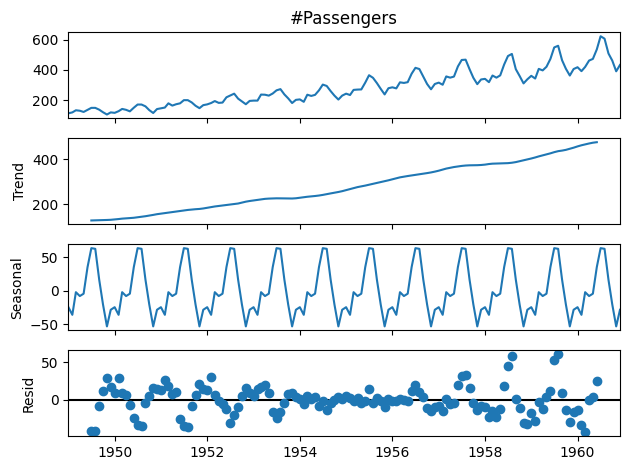

In [24]:
decomposition = seasonal_decompose(df['#Passengers'], model='additive',period=12)
decomposition.plot()
plt.show()



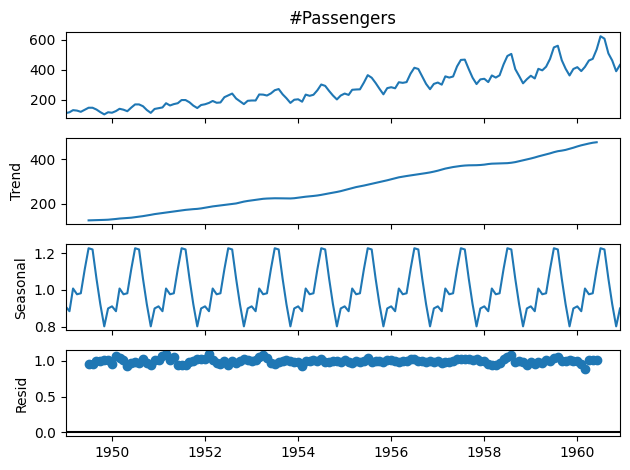

In [25]:
decomposition = seasonal_decompose(df['#Passengers'], model='multiplicative',period=12)
decomposition.plot()
plt.show()


# step 5 acess the composnents

In [30]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#show components in the dataset

pd.concat([trend,seasonal,residual],axis=1).head(20)

,trend,seasonal,resid
Month,,,
1949-01-01,NaN,0.910230,NaN
1949-02-01,NaN,0.883625,NaN
1949-03-01,NaN,1.007366,NaN
1949-04-01,NaN,0.975906,NaN
1949-05-01,NaN,0.981378,NaN
1949-06-01,NaN,1.112776,NaN
1949-07-01,126.791667,1.226556,0.951664
1949-08-01,127.250000,1.219911,0.953401
1949-09-01,127.958333,1.060492,1.002220
